In [93]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from scipy.stats import pearsonr

In [94]:
import numpy as np
import seaborn as sns


print(np.__version__)
print(pd.__version__)

1.21.5
1.3.5


In [95]:
# loading my tinder data in, i only need some of the data ie. the data contained within Usage and Messages

f = open('C:/Users/Verneri/Downloads/myData/data.json', 'r', encoding="utf8")
data = json.load(f)
usageData = data["Usage"]
messagesData = data["Messages"]
f.close()

In [96]:
# checking first 5 values of dictionary

list(usageData["swipes_likes"].items())[:5]

[('2019-07-25', 2),
 ('2019-07-26', 30),
 ('2019-07-28', 4),
 ('2019-07-30', 6),
 ('2019-07-31', 4)]

In [97]:
# checking that i have the same amount of recorded days for likes and matches, this is true: 197 days
# though i notice that some days dont have any records and the days are completely missing for some unknown reason
# the days are also missing in the .json file that tinder sent me, so my code isnt the problem

# get_records returns and prints the number of likes and matches during a specified time period
# the first array contains my likes on different days and the second array my matches

def get_records(history, start_date, end_date):
    dataInInterval = []
    dateLen = 0
    for date, entry in history.items():
        dateLen = dateLen + 1
        if start_date <= date <= end_date:
             dataInInterval.append(history[date])
    print(dataInInterval, '\n', '\n', 'Number of values in interval: ', len(dataInInterval), '\n')
    return(sum(dataInInterval))
    
print("my likes", "\n")
likes = get_records(usageData["swipes_likes"], '2022-01-02', '2022-11-22')
print("my matches", "\n")
matches = get_records(usageData["matches"], '2022-01-02', '2022-11-22')


# the ratio of matches to likes gets better over time when comparing different periods

print('Ratio of matches to likes: ', (matches / likes)* 100, '%')


my likes 

[39, 45, 5, 3, 16, 27, 0, 36, 0, 0, 0, 13, 0, 30, 4, 2, 0, 4, 0, 36, 0, 25, 0, 38, 0, 4, 41, 32, 35, 10, 1, 38, 0, 12, 42, 43, 58, 49, 5, 16, 0, 12, 32, 3, 6, 0, 0, 0, 5, 5, 3, 2, 0, 0, 0, 0, 0, 4, 0, 10, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 42, 50, 0, 0, 50, 0, 50, 50, 97, 52, 100, 49, 50, 49, 47, 16, 25, 49, 0, 50, 78, 18, 0, 15, 0, 50, 60, 51, 51, 72, 49, 1, 0, 0, 0, 0, 0, 0, 25, 0, 0, 44, 20, 50, 50, 0, 25, 0, 0, 0, 0, 0, 92, 1, 41, 48, 28, 34, 37, 10, 38, 26, 0, 36, 18, 6, 0, 22, 51, 44, 8, 11, 21, 15, 24, 40, 49, 1, 0, 0, 49, 50, 0, 0, 26, 19, 19, 7, 0, 0, 22, 29, 33, 27, 0, 0, 1, 14, 11, 15, 0, 7, 9, 17, 0, 9, 12, 17, 3, 0, 0, 0, 0] 
 
 Number of values in interval:  197 

my matches 

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 10, 2, 0, 1, 1, 7, 2, 0, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 

In [98]:
# missing records are maybe caused by me not logging into tinder and thus nothing, not even the date being recorded
# if this is the case then my analysis is not skewed

In [99]:

likes = get_records(usageData["swipes_likes"], '2021-01-02', '2021-11-22')
matches = get_records(usageData["matches"], '2021-01-02', '2021-11-22')

print('Ratio of matches to likes: ', (matches / likes)* 100, '%')


[20, 0, 0, 1, 0, 30, 24, 1, 4, 11, 7, 35, 22, 0, 0, 9, 34, 0, 3, 45, 0, 0, 8, 0, 1, 0, 0, 2, 21, 47, 0, 0, 0, 34, 4, 0, 0, 0, 0, 5, 7, 0, 15, 0, 2, 0, 2, 15, 0, 17, 11, 6, 18, 9, 0, 46, 0, 6, 10, 0, 0, 7, 7, 0, 2, 0, 0, 6, 0, 0, 3, 21, 6, 4, 0, 5, 0, 64, 23, 40, 2, 30, 0, 21, 0, 18, 28, 0, 71, 28, 0, 0, 0, 0, 0, 59, 77, 0, 0, 99, 0, 82, 7, 96, 1, 0, 32, 0, 35, 19, 0, 11, 14, 30, 57, 0, 5, 38, 0, 0, 1, 14, 0, 32, 34, 1, 23, 0, 22, 1, 1, 4, 3, 8, 14, 0, 29, 4, 2, 0, 0, 0, 2, 9, 0, 0, 9, 0, 0, 13, 41, 0, 0, 9, 5, 51, 1, 50, 12, 32, 50, 37, 13, 1, 55, 29, 21, 13, 50, 0, 51, 6, 28, 13, 14, 12, 50, 25, 0, 1, 1, 16, 11, 22, 23, 0, 0, 9, 27, 0, 0, 8, 0, 0, 7, 3, 0, 28, 10, 2, 0, 22, 0, 0, 0, 49, 0, 0, 1, 0, 2] 
 
 Number of values in interval:  211 

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

In [100]:
likes = get_records(usageData["swipes_likes"], '2020-01-02', '2020-11-22')
matches = get_records(usageData["matches"], '2020-01-02', '2020-11-22')

print('Ratio of matches to likes: ', (matches / likes)* 100, '%')


[46, 0, 2, 0, 31, 0, 1, 13, 34, 16, 3, 0, 5, 22, 7, 24, 4, 2, 2, 1, 4, 6, 2, 4, 9, 7, 32, 13, 15, 8, 0, 6, 1, 13, 11, 26, 19, 11, 26, 1, 14, 0, 5, 4, 0, 7, 7, 3, 0, 1, 0, 29, 19, 8, 9, 14, 0, 0, 8, 0, 4, 0, 1, 0, 7, 0, 0, 3, 3, 4, 5, 0, 1, 12, 8, 6, 0, 10, 0, 15, 0, 0, 0, 11, 2, 0, 0, 16, 0, 13, 4, 1, 0, 6, 0, 0, 3, 0, 3, 8, 3, 1, 50, 32, 21, 14, 0, 25, 3, 11, 2, 4, 0, 4, 2, 0, 3, 1, 6, 1, 0, 1, 4, 0, 14, 8, 1, 4, 1, 5, 1, 2, 2, 2, 0, 1, 6, 4, 18, 0, 14, 2, 12, 11, 1, 6, 1, 10, 10, 16, 0, 29, 80, 32, 0, 49, 13, 0, 8, 12, 0, 33, 15, 0, 0, 0, 0, 1, 15, 32, 0, 16, 0, 1, 34, 18, 12, 36, 0, 0, 10, 4, 2, 0, 6, 4, 56, 24, 27, 24, 17, 18, 14, 11, 8, 4, 11, 11, 14, 52, 22, 9, 15, 4, 0, 8, 17, 10, 0, 10, 23, 0, 0, 0, 9, 11, 0, 14, 5, 7, 1, 12, 10, 1, 4, 12, 0, 7, 0, 1, 2, 0, 0, 20, 32, 6, 1, 0, 0, 0, 40, 99, 12, 20, 1, 2, 0, 1, 36, 18, 9, 0, 1, 0, 0, 1] 
 
 Number of values in interval:  256 

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [101]:
pd.Series(usageData["swipes_likes"].values()).head()

0     2
1    30
2     4
3     6
4     4
dtype: int64

In [102]:
# the pearsonr method tells us that there is a slight positive correlation of ~0.2 between the
# amount of likes i gave and the matches i got. The p-value is very close to 0, so its very unlikely
# that this correlation would form purely due to chance

passes = pd.Series(usageData["swipes_passes"].values())
likes = pd.Series(usageData["swipes_likes"].values())
matches = pd.Series(usageData['matches'].values())

dfSwipesMatches = pd.concat([likes, matches, passes], axis=1) 
    
# Apply the pearsonr()
corr = pearsonr(likes, matches)
corr

(0.19971908742098687, 1.0944231935865626e-08)

In [103]:
# gives the same result as correlation above

np.corrcoef(likes, matches)

array([[1.        , 0.19971909],
       [0.19971909, 1.        ]])

In [104]:
# same method for passes and matches

pearsonr(passes, matches)

(0.08298314974119696, 0.018530421603615132)

In [105]:
#corr.confidence_interval()

In [106]:
#pd.set_option('display.max_rows', None)

In [107]:
dfSwipesMatches.rename(columns={0: 'Likes', 1: 'Matches', 2: 'Passes'}, inplace=True)
dfSwipesMatches.tail(10)

,Likes,Matches,Passes
795,17,0,90
796,0,1,0
797,9,0,23
798,12,0,64
799,17,0,46
800,3,1,22
801,0,0,0
802,0,0,0
803,0,1,0
804,0,0,0


In [108]:
dfSwipesR = pd.DataFrame.from_dict(usageData["swipes_likes"].items())
dfSwipesR.columns = ['Date', 'SwipeR']
dfSwipesR.head()

,Date,SwipeR
0,2019-07-25,2
1,2019-07-26,30
2,2019-07-28,4
3,2019-07-30,6
4,2019-07-31,4


In [109]:
# a lot of dates are missing as seen below

In [110]:
df = dfSwipesR
 
# Setting the Date values as index
df = df.set_index('Date')
    
# to_datetime() method converts string format to a DateTime object
df.index = pd.to_datetime(df.index)
 
# dates which are not in the sequence are returned
missingDates2022 = pd.date_range(start="2022-01-02", end="2022-11-22").difference(df.index)
print(missingDates2022)
print(len(missingDates2022))

DatetimeIndex(['2022-01-07', '2022-01-12', '2022-01-14', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-21', '2022-01-24',
               '2022-01-26', '2022-01-28',
               ...
               '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
               '2022-11-12', '2022-11-14', '2022-11-17', '2022-11-18',
               '2022-11-19', '2022-11-20'],
              dtype='datetime64[ns]', length=128, freq=None)
128


In [111]:
missingDates2021 = pd.date_range(start="2021-01-02", end="2021-11-22").difference(df.index)
print(missingDates2021)
print(len(missingDates2021))

DatetimeIndex(['2021-01-04', '2021-01-06', '2021-01-08', '2021-01-10',
               '2021-01-11', '2021-01-16', '2021-01-18', '2021-01-21',
               '2021-01-24', '2021-01-25',
               ...
               '2021-10-27', '2021-10-28', '2021-11-04', '2021-11-10',
               '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14',
               '2021-11-18', '2021-11-21'],
              dtype='datetime64[ns]', length=114, freq=None)
114


In [112]:
missingDates2020 = pd.date_range(start="2020-01-02", end="2020-11-22").difference(df.index)
print(missingDates2020)
print(len(missingDates2020))

DatetimeIndex(['2020-01-15', '2020-01-20', '2020-01-24', '2020-02-07',
               '2020-02-11', '2020-02-14', '2020-02-15', '2020-03-13',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-14',
               '2020-04-22', '2020-04-26', '2020-05-08', '2020-05-23',
               '2020-06-11', '2020-06-14', '2020-06-20', '2020-06-21',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-07-04',
               '2020-07-10', '2020-07-18', '2020-08-24', '2020-08-26',
               '2020-08-28', '2020-09-01', '2020-09-02', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-20',
               '2020-09-23', '2020-09-25', '2020-09-27', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-09', '2020-10-10',
               '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-23',
      

In [113]:
# 2019-07-25', '2019-12-31'

missingDates2019 = pd.date_range(start="2019-07-25", end="2019-12-31").difference(df.index)
print(missingDates2019)
print(len(missingDates2019))

DatetimeIndex(['2019-07-27', '2019-07-29', '2019-08-01', '2019-08-02',
               '2019-08-03', '2019-08-04', '2019-08-12', '2019-08-13',
               '2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27',
               '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-01',
               '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05',
               '2019-09-06', '2019-09-07', '2019-09-08', '2019-09-09',
               '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
               '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-28', '2019-09-29', '2019-10-10',
               '2019-10-17', '2019-10-18', '2019-11-01', '2019-11-03',
      

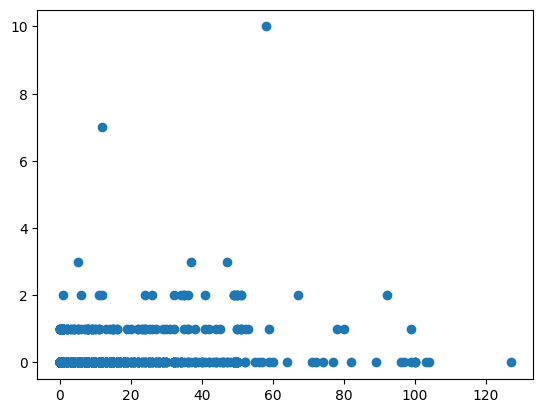

In [114]:
plt.scatter(dfSwipesMatches['Likes'], dfSwipesMatches['Matches'])

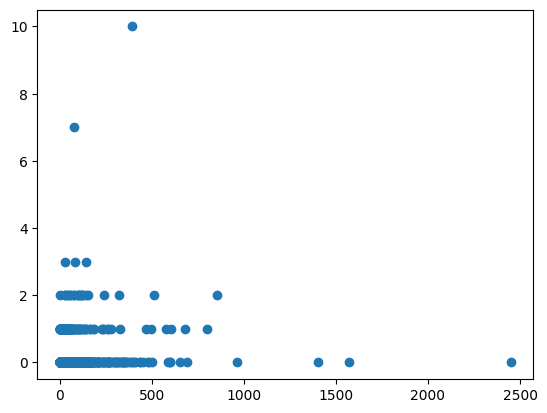

In [115]:
plt.scatter(dfSwipesMatches['Passes'], dfSwipesMatches['Matches'])

<AxesSubplot:xlabel='Likes', ylabel='Matches'>

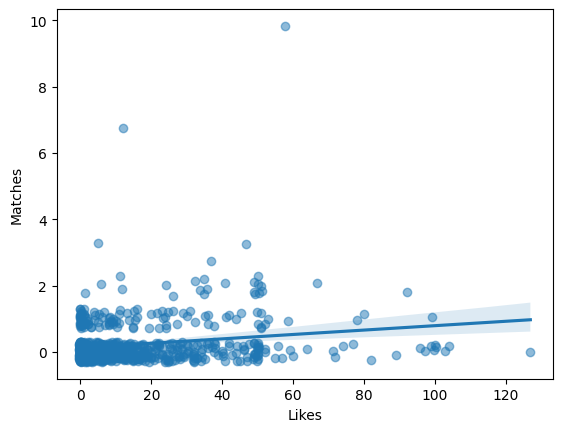

In [116]:
# often u get matches the next day after swiping during the previous one, how to take this into consideration?
# one solution would be to look at the overall matches from a longer period of time like a week, month or year

# jitter adds some randomness to the placing of points, so they are easier to see if they would otherwise be 
# concealed under each other

# sns.swarmplot() might be useful

sns.regplot(x='Likes',
            y='Matches',
            data=dfSwipesMatches,
            fit_reg=True,  # fit a regression line
            x_jitter=0.3,  # could also dynamically set this with range of data
            y_jitter=0.3,
            scatter_kws={'alpha': 0.5})  # set transparency to 50%

In [117]:
likesSum = sum(usageData["swipes_likes"].values())
passesSum = sum(usageData["swipes_passes"].values())
swipesAll = likesSum + passesSum

print('The sum of my activities:', '\n')
print('swipes: ', swipesAll)
print('likes: ', likesSum)
print('passes: ', passesSum)

matchesSum = sum(usageData['matches'].values())
print('matches:' , matchesSum)

The sum of my activities: 

swipes:  78143
likes:  10735
passes:  67408
matches: 176


In [118]:
# assuming i spent 1 second per swipe then i spent a total of 21 hours and 42.4 minutes ((0,0166×78143)/60)
# just swiping, not taking in the amount of time i spent messaging people



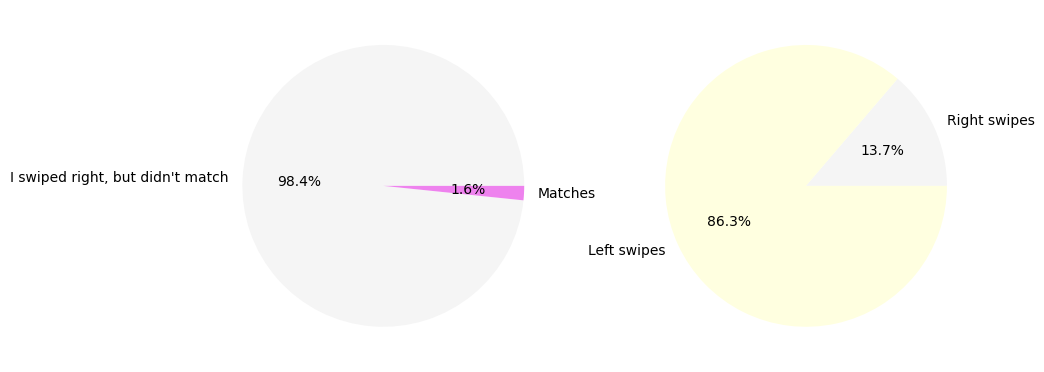

In [119]:
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(10,10))

colors = ['whitesmoke','violet']
colors2 = ['whitesmoke','lightyellow']

ax1.pie([likesSum, passesSum], labels=['Right swipes', 'Left swipes'], colors = colors2, autopct='%.1f%%')

slices = [likesSum - matchesSum, matchesSum]
activities = ['I swiped right, but didn\'t match', 'Matches']
ax2.pie(slices, labels=activities, colors=colors, autopct='%.1f%%')

plt.show()

In [120]:
likes = max(usageData["swipes_likes"].values())
passes = max(usageData["swipes_passes"].values())

print('Max number of values in a day:', '\n')
print('swipes ', likes + passes)
print('likes ', likes)
print('passes', passes, '\n')

messagesReceived = max(usageData["messages_received"].values())
messagesSent = max(usageData["messages_sent"].values())
appOpens = max(usageData["app_opens"].values())

print('messages sent', messagesSent)
print('messages received', messagesReceived)
print('app opens ', appOpens)

Max number of values in a day: 

swipes  2577
likes  127
passes 2450 

messages sent 67
messages received 153
app opens  60


In [121]:
# how i managed to open the app 60 times in a single day is beyond me D:

In [122]:
list(usageData["matches"].items())[:5]

[('2019-07-25', 0),
 ('2019-07-26', 0),
 ('2019-07-28', 0),
 ('2019-07-30', 0),
 ('2019-07-31', 0)]

In [123]:
dfMatches = pd.DataFrame(usageData['matches'].items(), columns=['Date', 'Matches'])
print(dfMatches.tail(10))

           Date  Matches
795  2022-11-07        0
796  2022-11-08        1
797  2022-11-09        0
798  2022-11-10        0
799  2022-11-11        0
800  2022-11-13        1
801  2022-11-15        0
802  2022-11-16        0
803  2022-11-21        1
804  2022-11-22        0


         Date  Matches    Weekday
0  2019-07-25        0   Thursday
1  2019-07-26        0     Friday
2  2019-07-28        0     Sunday
3  2019-07-30        0    Tuesday
4  2019-07-31        0  Wednesday


<AxesSubplot:xlabel='Weekday'>

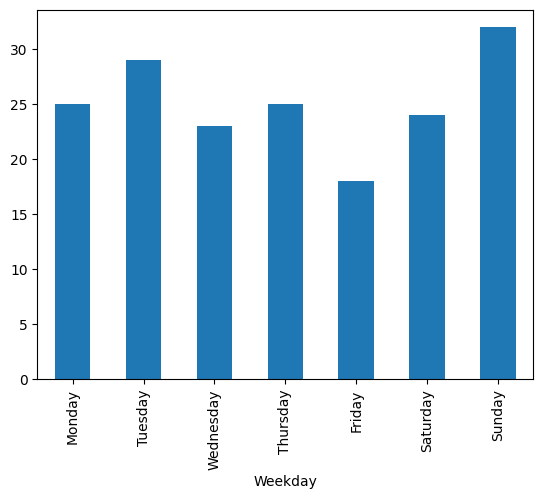

In [124]:
# i got about the same amount of matches on every weekday, the least on friday and the most on sunday

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dfMatches['Weekday'] = pd.to_datetime(dfMatches['Date']).dt.day_name()

print(dfMatches.head())
dfMatches.groupby('Weekday')['Matches'].sum().reindex(days).plot.bar()



In [125]:
len(messagesData)

139

In [126]:
# the data i received from tinder were in .json format

messagesData[100]['messages']

[{'to': 38,
  'from': 'You',
  'message': 'hellou, ootko seurannu valko-venäjän tilannetta?',
  'sent_date': 'Sat, 13 Feb 2021 08:53:58 GMT'},
 {'to': 38,
  'from': 'You',
  'message': 'Jännä tilanne siel, mua ihmetyttää, et miten Alexander Lukashenko pystyy edelleen pitämään vallasta kiinni vaikka niin suuri ennemmistö vastustaa sitä. 0_o',
  'sent_date': 'Sun, 14 Feb 2021 09:16:33 GMT'},
 {'to': 38,
  'from': 'You',
  'message': 'Mitä luulet jos venäjä ei olisi missään vaiheessa tukenut häntä niin olisiko nykyinen tilanne miten erilainen?',
  'sent_date': 'Sun, 14 Feb 2021 09:18:42 GMT'}]

In [127]:
message_lists = []
for x in messagesData:
    if len(x['messages']) > 0:
        message_lists.append(x['messages'])

In [128]:
message_lists[:1]

[[{'to': 138,
   'from': 'You',
   'message': 'moip, mikä sua kiinnostaa psykassa eniten?😄',
   'sent_date': 'Sun, 13 Nov 2022 16:23:58 GMT'},
  {'to': 138,
   'from': 'You',
   'message': 'uuu, mistä sä luulet sun mielenkiinnon heränneen tuota kohtaan?',
   'sent_date': 'Tue, 15 Nov 2022 16:49:17 GMT'},
  {'to': 138,
   'from': 'You',
   'message': 'toivottavasti menee pääsykokeet nappiin ens kerral, hankalaa päästä sinne🤔',
   'sent_date': 'Tue, 15 Nov 2022 16:50:23 GMT'},
  {'to': 138,
   'from': 'You',
   'message': 'ootko kuunnellu utube kanavaa nimeltä &quot;Soft White Underbelly&quot;? Sielt löytää paljon kiinnostavii tarinoita ja monet on aika synkkiä',
   'sent_date': 'Tue, 15 Nov 2022 16:53:22 GMT'},
  {'to': 138,
   'from': 'You',
   'message': 'opiskelen tietojenkäsittelyy yliopistos, data-analytiikka kiinnostaa mua eniten. Matiikka ei mua muuten kauheesti kiinnosta, mut tilastotiede on jännää. Tätä sul on psykan kokeessa paljo eikö? ',
   'sent_date': 'Tue, 15 Nov 2022 19:

In [129]:
messages = []       
for x in range(0, len(message_lists)):
    msg = message_lists[x]
    for y in range(0, len(msg)):
        messages.append(msg[y]['message'])

In [130]:
messages[:5]

['moip, mikä sua kiinnostaa psykassa eniten?😄',
 'uuu, mistä sä luulet sun mielenkiinnon heränneen tuota kohtaan?',
 'toivottavasti menee pääsykokeet nappiin ens kerral, hankalaa päästä sinne🤔',
 'ootko kuunnellu utube kanavaa nimeltä &quot;Soft White Underbelly&quot;? Sielt löytää paljon kiinnostavii tarinoita ja monet on aika synkkiä',
 'opiskelen tietojenkäsittelyy yliopistos, data-analytiikka kiinnostaa mua eniten. Matiikka ei mua muuten kauheesti kiinnosta, mut tilastotiede on jännää. Tätä sul on psykan kokeessa paljo eikö? ']

In [131]:
word_list = [word for line in messages for word in line.split()]
print(word_list[:10])

['moip,', 'mikä', 'sua', 'kiinnostaa', 'psykassa', 'eniten?😄', 'uuu,', 'mistä', 'sä', 'luulet']


In [132]:
char_list = ['https', 'colon']
res = [ele for ele in word_list if all(ch not in ele for ch in char_list)]

print(res[:10])

['moip,', 'mikä', 'sua', 'kiinnostaa', 'psykassa', 'eniten?😄', 'uuu,', 'mistä', 'sä', 'luulet']


In [133]:
messages = list(map(lambda x: x.replace('&sol;', '').replace('&rpar;', '').replace('&lpar;', '').replace('&quot;', ''),res))
print(messages[:10])

['moip,', 'mikä', 'sua', 'kiinnostaa', 'psykassa', 'eniten?😄', 'uuu,', 'mistä', 'sä', 'luulet']


In [134]:
# stopwords that i use to remove words that have little to no value in a wordcloud like "minä" 
# because they hold so little information

stopwordsFinn = open('C:/Users/Verneri/Downloads/stopwordsFinn.txt', 'r', encoding="utf8")

stopwords = stopwordsFinn.read().splitlines()

print(stopwords[:10])

['aiemmin', 'aika', 'aikaa', 'aikaan', 'aikaisemmin', 'aikaisin', 'aikajen', 'aikana', 'aikoina', 'aikoo']


In [135]:
import re

clean_words_list = []

for word in messages:
        res = re.sub(r'[^\w\s]', '', word.lower())
        if res not in stopwords:
            clean_words_list.append(res)
            
print(clean_words_list[:20])


['psykassa', 'luulet', 'mielenkiinnon', 'heränneen', 'pääsykokeet', 'nappiin', 'hankalaa', 'kuunnellu', 'utube', 'kanavaa', 'nimeltä', 'soft', 'white', 'underbelly', 'sielt', 'löytää', 'kiinnostavii', 'tarinoita', 'synkkiä', 'opiskelen']


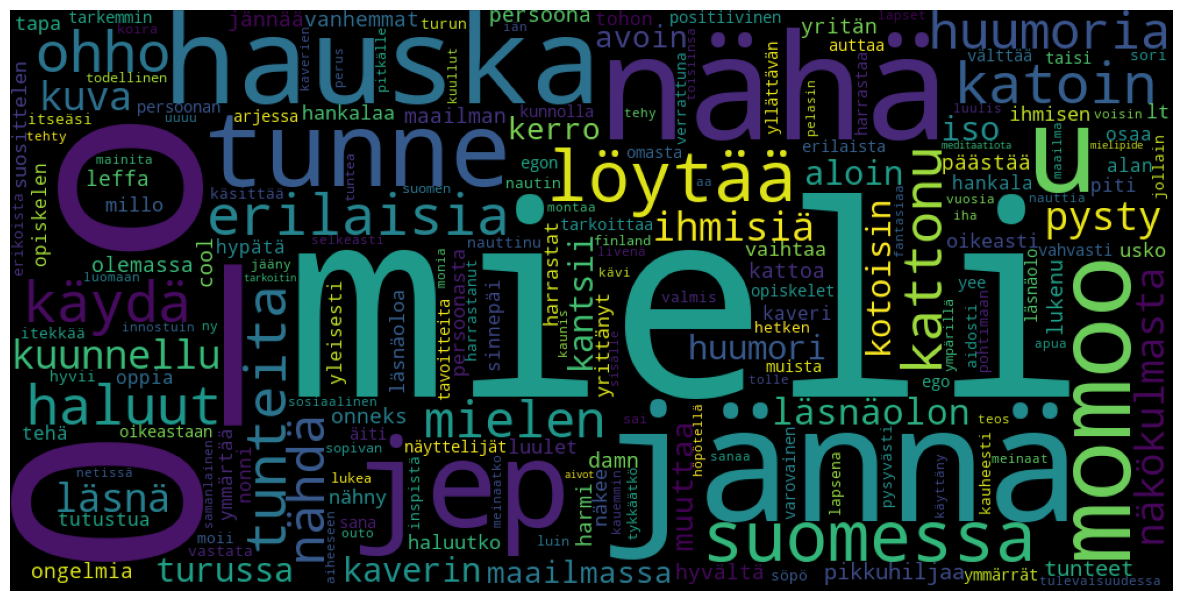

In [136]:
from wordcloud import WordCloud

# this wordcloud shows you the words i used the most often while chatting on tinder

#convert list to string and generate
unique_string=(" ").join(clean_words_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [137]:
# next i want to try and use lemmatize for finnish words in order to create a better wordcloud that doesnt have words with the 
# same meaning, but with just a slightly different spelling like "tunne" and "tunteita"
# with lemmatize u can turn these words into their base form like "tuntea" and remove "extra" words
# WordNetLemmatizer only works with english, so i have to use a package designed for finnish


